In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [3]:
drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/fraudTest.csv")
df.head()

Mounted at /content/gdrive/


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [5]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]
df_select.columns

Index(['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud'], dtype='object')

In [6]:
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])

<ipython-input-6-99f721e4ce0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])


In [7]:
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

<ipython-input-7-fa4370ef92e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


In [8]:
X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

In [9]:
X.head()

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,25,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,302,33,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,34496,53,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,54767,15,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1126,17,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [11]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, train_size=0.7, random_state=1)
X_Train

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
382669,196.46,50835,27,0,0,0,0,1,0,0,0,0,0,0,0,0,0
363902,18.86,24645,30,0,0,0,0,0,0,0,0,0,0,1,0,0,0
31195,19.42,2504700,15,0,0,0,0,0,0,0,1,0,0,0,0,0,0
305241,4.45,2328,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0
250566,56.04,4508,53,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371403,1.28,69,33,0,1,0,0,0,0,0,0,0,0,0,0,0,0
491263,5.87,1563,59,0,0,0,0,0,0,0,0,0,0,0,1,0,0
470924,8.11,13602,21,0,0,0,0,0,0,0,0,0,0,0,0,1,0
491755,2.03,21902,13,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [12]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [13]:
ros = RandomOverSampler(random_state=0)
ros.fit(X_Train,Y_Train)
X_resampled, y_resampled = ros.fit_resample(X_Train,Y_Train)

In [14]:
rus = RandomUnderSampler(random_state=0)
rus.fit(X_Train,Y_Train)
X_resampled1, y_resampled1 = rus.fit_resample(X_Train,Y_Train)

In [15]:
oversample = SMOTE()
X_SMOTE, y_SMOTE = oversample.fit_resample(X_Train,Y_Train)

### 3.) Train three logistic regression models

In [17]:
from sklearn.linear_model import LogisticRegression
model_ros = LogisticRegression()
model_ros.fit(X_resampled, y_resampled)

LogisticRegression()

In [18]:
model_rus = LogisticRegression()
model_rus.fit(X_resampled1, y_resampled1)

LogisticRegression()

In [19]:
model_smote = LogisticRegression()
model_smote.fit(X_SMOTE, y_SMOTE)

LogisticRegression()

### 4.) Test the three models

In [21]:
y_pred_ros = model_ros.predict(X_Test)
y_pred_rus = model_rus.predict(X_Test)
y_pred_smote = model_smote.predict(X_Test)

### 5.) Which performed best in Out of Sample metrics?

In [23]:
from sklearn.metrics import classification_report

# Create a classification report for each model
report_ros = classification_report(Y_Test, y_pred_ros)
report_rus = classification_report(Y_Test, y_pred_rus)
report_smote = classification_report(Y_Test, y_pred_smote)

print("Oversampled Model Report:\n", report_ros)
print("Undersampled Model Report:\n", report_rus)
print("SMOTE Model Report:\n", report_smote)

Oversampled Model Report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.90    166081
           1       0.02      0.76      0.03       635

    accuracy                           0.81    166716
   macro avg       0.51      0.79      0.46    166716
weighted avg       1.00      0.81      0.89    166716

Undersampled Model Report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.89    166081
           1       0.02      0.77      0.03       635

    accuracy                           0.81    166716
   macro avg       0.51      0.79      0.46    166716
weighted avg       1.00      0.81      0.89    166716

SMOTE Model Report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90    166081
           1       0.02      0.76      0.03       635

    accuracy                           0.82    166716
   macro avg       0.51      0.79      0.47    16671

It can be seen from the above resutls that SMOTE performed the best since it has the highest accuracy.

### 6.) Pick two features and plot the two classes before and after SMOTE

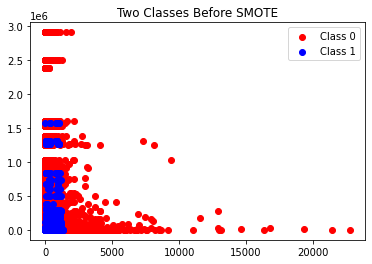

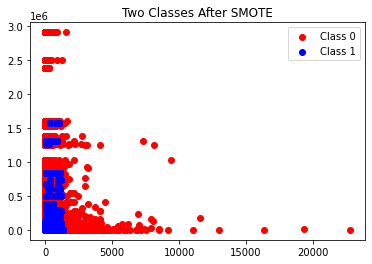

In [24]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Pick two features
X1 = df[['amt', 'city_pop']]
y1 = df['is_fraud']

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='minority')
X1_resampled, y1_resampled = smote.fit_resample(X1, y1)

# Plot the two classes before SMOTE
plt.scatter(X[y==0]['amt'], X[y==0]['city_pop'], color='red', label='Class 0')
plt.scatter(X[y==1]['amt'], X[y==1]['city_pop'], color='blue', label='Class 1')
plt.legend()
plt.title("Two Classes Before SMOTE")
plt.show()

# Plot the two classes after SMOTE
plt.scatter(X_resampled[y_resampled==0]['amt'], X_resampled[y_resampled==0]['city_pop'], color='red', label='Class 0')
plt.scatter(X_resampled[y_resampled==1]['amt'], X_resampled[y_resampled==1]['city_pop'], color='blue', label='Class 1')
plt.legend()
plt.title("Two Classes After SMOTE")
plt.show()
